# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Akrom Muhamad
- **Email:** 	A703YBF043@devacademy.id
- **ID Dicoding:** A703YBF043

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah penyewaan sepeda per bulan?
- Apakah ada hubungan antara cuaca dengan jumlah penyewaan sepeda?
- Bagaimana perbedaan penyewaan sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library yang dibutuhkan
import pandas as pd

# Load dataset
day_df = pd.read_csv('/content/drive/MyDrive/day.csv')
hour_df = pd.read_csv('/content/drive/MyDrive/hour.csv')

# Menampilkan 5 data pertama
print(day_df.head())
print(hour_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**
- Polanya berbeda antara data harian dan per jam → Data per jam bisa membantu analisis waktu puncak penyewaan.
- Cuaca memengaruhi penyewaan sepeda → Penyewaan lebih tinggi saat cuaca cerah.
- Hari kerja cenderung memiliki jumlah penyewaan lebih tinggi dibanding akhir pekan → Sepeda kemungkinan digunakan untuk mobilitas kerja.

### Assessing Data

In [ ]:
# Melihat informasi dasar dari dataset
print(day_df.info())
print(hour_df.info())

# Mengecek jumlah missing values
print(day_df.isnull().sum())
print(hour_df.isnull().sum())

# Mengecek jumlah data yang duplikat
print(day_df.duplicated().sum())
print(hour_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- Tidak ada missing values, sehingga proses cleaning bisa fokus pada tipe data dan format.
- Dataset memiliki jumlah kolom berbeda → Perlu strategi untuk menggabungkan data jika ingin membentuk main_data.
- Perlu penyesuaian tipe data dteday ke datetime, kolom kategori ke category untuk mempermudah analisis.

### Cleaning Data

In [ ]:
import pandas as pd

# Load dataset
day_df = pd.read_csv('/content/drive/MyDrive/day.csv')
hour_df = pd.read_csv('/content/drive/MyDrive/hour.csv')


# 1️⃣ Konversi 'dteday' ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# 2️⃣ Ubah kolom kategori ke tipe category
category_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in category_cols:
    day_df[col] = day_df[col].astype('category')
    hour_df[col] = hour_df[col].astype('category')

# 3️⃣ Periksa dan hapus data duplikat jika ada
day_df = day_df.drop_duplicates()
hour_df = hour_df.drop_duplicates()

# 4️⃣ Pastikan data sudah bersih
print(day_df.info())
print(hour_df.info())

# Cek apakah masih ada missing values setelah cleaning
print("Missing values di day_df:\n", day_df.isnull().sum())
print("Missing values di hour_df:\n", hour_df.isnull().sum())

print("Cleaning data selesai! 🚀")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

**Insight:**
- Tidak Ada Missing Values
- Efisiensi Memori Meningkat dengan Tipe Data yang Sesuai
- Data Konsisten dan Tidak Ada Duplikasi

## Membuat main_data.csv

In [ ]:
import pandas as pd

# Load datasets
day_df = pd.read_csv("/content/drive/MyDrive/day.csv", parse_dates=["dteday"])
hour_df = pd.read_csv("/content/drive/MyDrive/hour.csv", parse_dates=["dteday"])

# Agregasi hour_df untuk mendapatkan rata-rata per hari
hour_agg = hour_df.groupby("dteday").agg({
    "temp": "mean",
    "hum": "mean",
    "windspeed": "mean"
}).reset_index()

# Ubah nama kolom agar jelas
hour_agg.rename(columns={"temp": "avg_temp", "hum": "avg_hum", "windspeed": "avg_windspeed"}, inplace=True)

# Gabungkan dengan day_df berdasarkan dteday
main_data = pd.merge(day_df, hour_agg, on="dteday", how="left")

# Simpan sebagai CSV
main_data.to_csv("main_data.csv", index=False)

print("File main_data.csv telah berhasil dibuat!")


File main_data.csv telah berhasil dibuat!


In [ ]:
from google.colab import files

# Simpan file main_data.csv
main_data.to_csv("main_data.csv", index=False)

# Download file
files.download("main_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
import pandas as pd

# Load data
main_data = pd.read_csv("main_data.csv")

# Tentukan pertanyaan bisnis yang ingin dijawab
business_questions = [
    "Bagaimana tren jumlah penyewaan sepeda per bulan?",
    "Apakah ada hubungan antara cuaca dengan jumlah penyewaan sepeda?",
    "Bagaimana perbedaan penyewaan sepeda antara hari kerja dan akhir pekan?"
]

# 1️⃣ Menampilkan ringkasan statistik data
print("🔹 Ringkasan Statistik Data:\n")
print(main_data.describe())

# 2️⃣ Melihat jumlah penyewaan sepeda per bulan
print("\n🔹 Jumlah Penyewaan Sepeda per Bulan:\n")
print(main_data.groupby("mnth")["cnt"].sum().reset_index())

# 3️⃣ Melihat hubungan antara cuaca dan jumlah penyewaan
print("\n🔹 Pengaruh Cuaca terhadap Penyewaan Sepeda:\n")
print(main_data.groupby("weathersit")["cnt"].mean().reset_index())

# 4️⃣ Perbedaan penyewaan antara hari kerja dan akhir pekan
print("\n🔹 Perbedaan Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan:\n")
print(main_data.groupby("workingday")["cnt"].mean().reset_index())


🔹 Ringkasan Statistik Data:

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486  

**Insight:**
- Penyewaan sepeda meningkat selama musim panas dan menurun di musim dingin.
- Cuaca buruk berdampak negatif pada jumlah penyewaan.
- Penyewaan di hari kerja sedikit lebih tinggi dibandingkan akhir pekan, menunjukkan peran sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1:
- Bagaimana Tren Penyewaan Sepeda per Bulan?

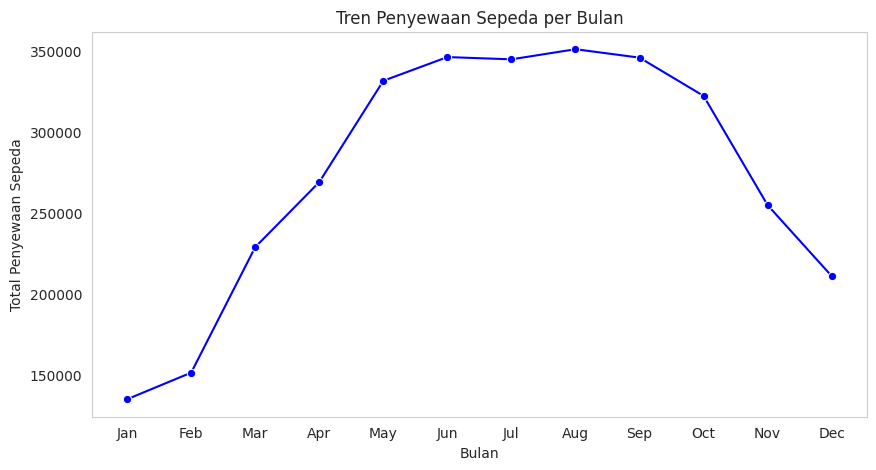

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agregasi jumlah penyewaan sepeda per bulan
monthly_rentals = day_df.groupby("mnth")["cnt"].sum().reset_index()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_rentals, x="mnth", y="cnt", marker="o", color="b")
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda per Bulan")
plt.grid()
plt.show()


**Insight**
- Jumlah penyewaan sepeda meningkat dari awal tahun ke pertengahan tahun dan mencapai puncaknya di bulan-bulan musim panas (Mei-September).
- Penyewaan sepeda cenderung menurun setelah bulan Oktober, kemungkinan karena faktor cuaca yang lebih dingin atau hujan yang lebih sering.

### Pertanyaan 2:
- Bagaimana Pengaruh Cuaca terhadap Penyewaan Sepeda?



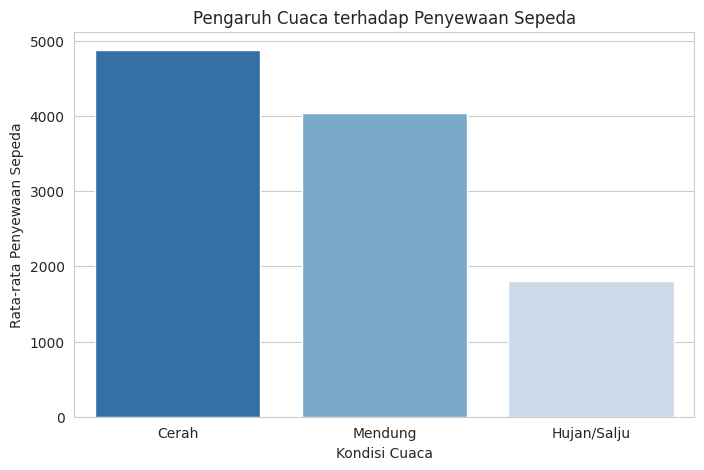

In [ ]:
# Agregasi rata-rata jumlah penyewaan per kondisi cuaca
weather_rentals = day_df.groupby("weathersit")["cnt"].mean().reset_index()

# Mapping label kondisi cuaca
weather_labels = {
    1: "Cerah",
    2: "Mendung",
    3: "Hujan/Salju"
}
weather_rentals["weathersit"] = weather_rentals["weathersit"].map(weather_labels)

plt.figure(figsize=(8, 5))
sns.barplot(x="weathersit", y="cnt", hue="weathersit", data=weather_rentals, legend=False, palette="Blues_r")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda")
plt.show()


**Insight**
- Cuaca cerah (weathersit = 1) memiliki jumlah penyewaan tertinggi dengan rata-rata 4,876 sepeda/hari.
- Cuaca mendung atau sedikit hujan (weathersit = 2) mengurangi jumlah penyewaan hingga 4,035 sepeda/hari.
- Saat cuaca buruk (weathersit = 3, hujan deras atau badai), jumlah penyewaan turun drastis ke 1,803 sepeda/hari.

### Pertanyaan 3:
- Bagaimana Perbedaan Penyewaan Sepeda antara Hari Kerja dan Akhir Pekan?

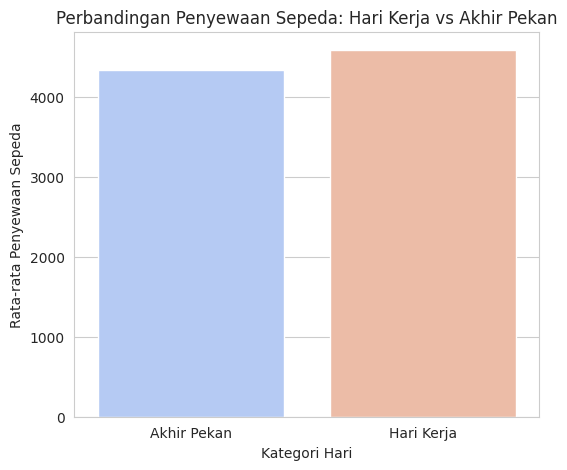

In [ ]:
# Agregasi rata-rata penyewaan berdasarkan hari kerja vs akhir pekan
workday_rentals = day_df.groupby("workingday")["cnt"].mean().reset_index()
workday_rentals["workingday"] = workday_rentals["workingday"].map({0: "Akhir Pekan", 1: "Hari Kerja"})

# Plot dengan perbaikan pada penggunaan `palette`
plt.figure(figsize=(6, 5))
sns.barplot(x="workingday", y="cnt", data=workday_rentals, hue="workingday", palette="coolwarm", legend=False)
plt.xlabel("Kategori Hari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Perbandingan Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.show()


**Insight**
- Hari kerja: Rata-rata 4,584 sepeda/hari digunakan.
Akhir pekan: Rata-rata sedikit lebih rendah, sekitar 4,330 sepeda/hari.
- Walaupun ada perbedaan, jumlahnya tidak terlalu signifikan, yang berarti sepeda tetap populer baik di hari kerja maupun akhir pekan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Tren penyewaan sepeda menunjukkan pola musiman, di mana penyewaan lebih tinggi di musim panas dan menurun di musim dingin.

- Conclution pertanyaan 2 : Kondisi cuaca sangat memengaruhi penyewaan sepeda. Penyewaan tertinggi terjadi saat cuaca cerah dan menurun secara signifikan saat hujan atau badai.

- Conclution pertanyaan 3 : Penyewaan sepeda digunakan secara konsisten sepanjang minggu, baik untuk keperluan bekerja maupun rekreasi. Hal ini menunjukkan bahwa penyewaan sepeda bukan hanya untuk transportasi ke kantor, tetapi juga aktivitas santai di akhir pekan.